<a href="https://colab.research.google.com/github/NALLAPANENILAKSHMISOWJANYA/MSAicteProject/blob/main/MSaicte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20


<ipython-input-1-a81d43d02c00>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hours = pd.date_range(start="2023-01-01", periods=500, freq='H')
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1093 - val_loss: 0.0239
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0266 - val_loss: 0.0216
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0218 - val_loss: 0.0203
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0231 - val_loss: 0.0194
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0199 - val_loss: 0.0200
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0177 - val_loss: 0.0187
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0187 - val_loss: 0.0197
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0200 - val_loss: 0.0188
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0184 - val_loss: 0.0183
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0176 - val_loss: 0.0200
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0177 - val_loss: 0.0182
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0181 - val_l

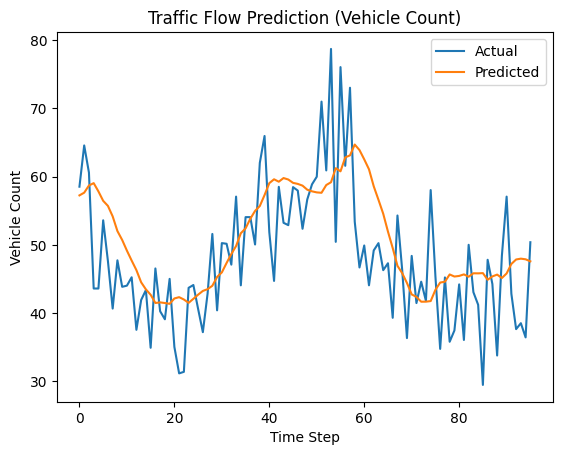

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


np.random.seed(0)
hours = pd.date_range(start="2023-01-01", periods=500, freq='H')
traffic_data = pd.DataFrame({
    'timestamp': hours,
    'vehicle_count': np.random.poisson(lam=50, size=500) + 10*np.sin(np.linspace(0, 50, 500))
})


scaler = MinMaxScaler()
traffic_data['scaled_count'] = scaler.fit_transform(traffic_data[['vehicle_count']])

def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 24
X, y = create_sequences(traffic_data['scaled_count'].values, SEQ_LEN)
X = X.reshape((X.shape[0], X.shape[1], 1))

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title('Traffic Flow Prediction (Vehicle Count)')
plt.xlabel('Time Step')
plt.ylabel('Vehicle Count')
plt.legend()
plt.show()
